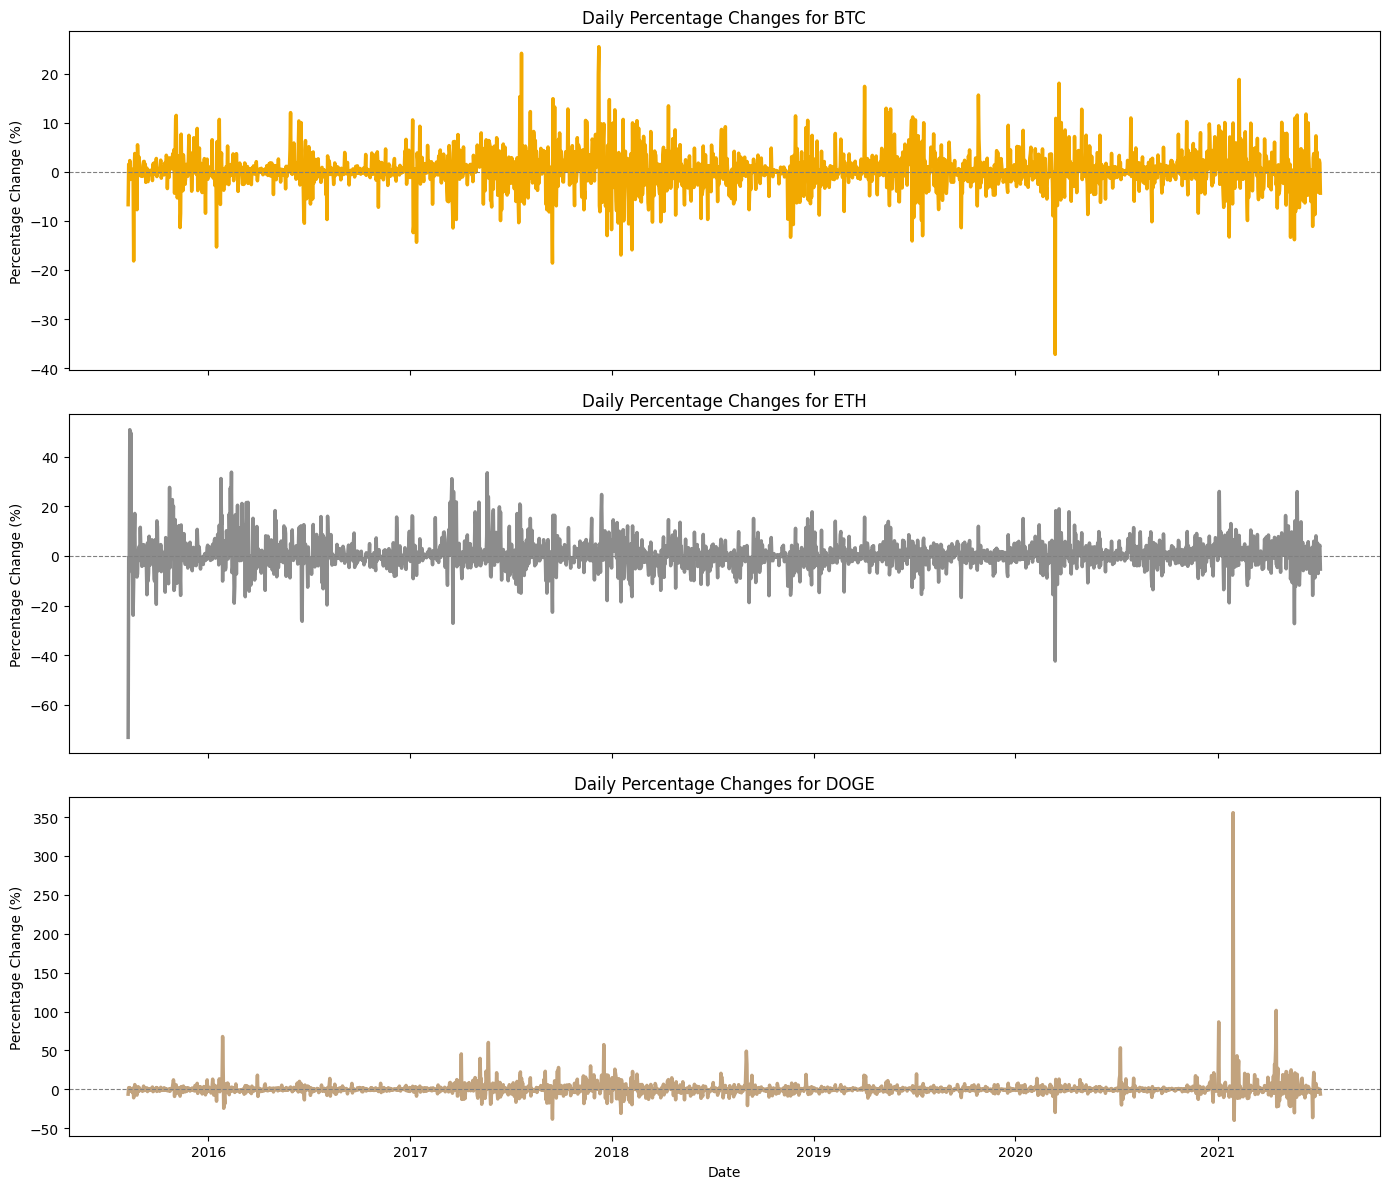

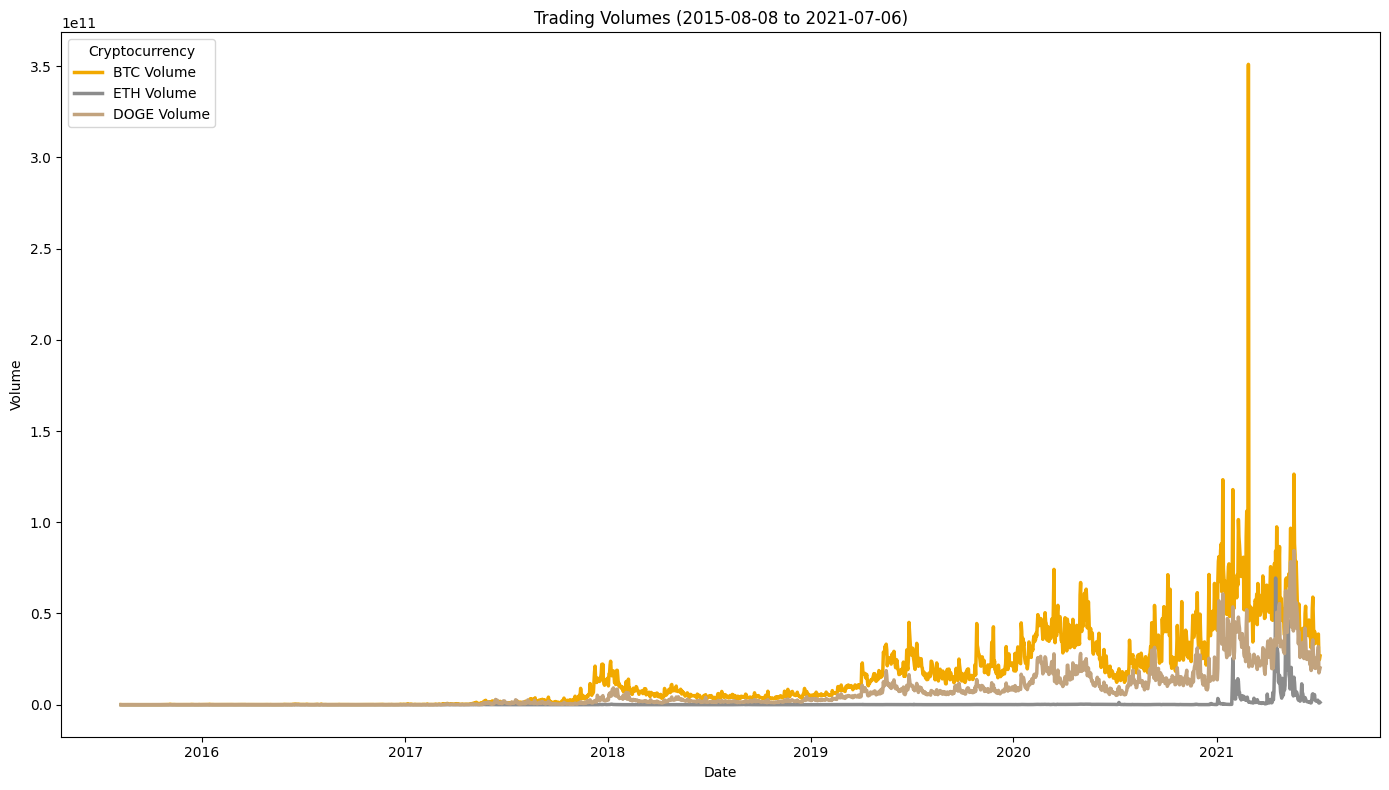

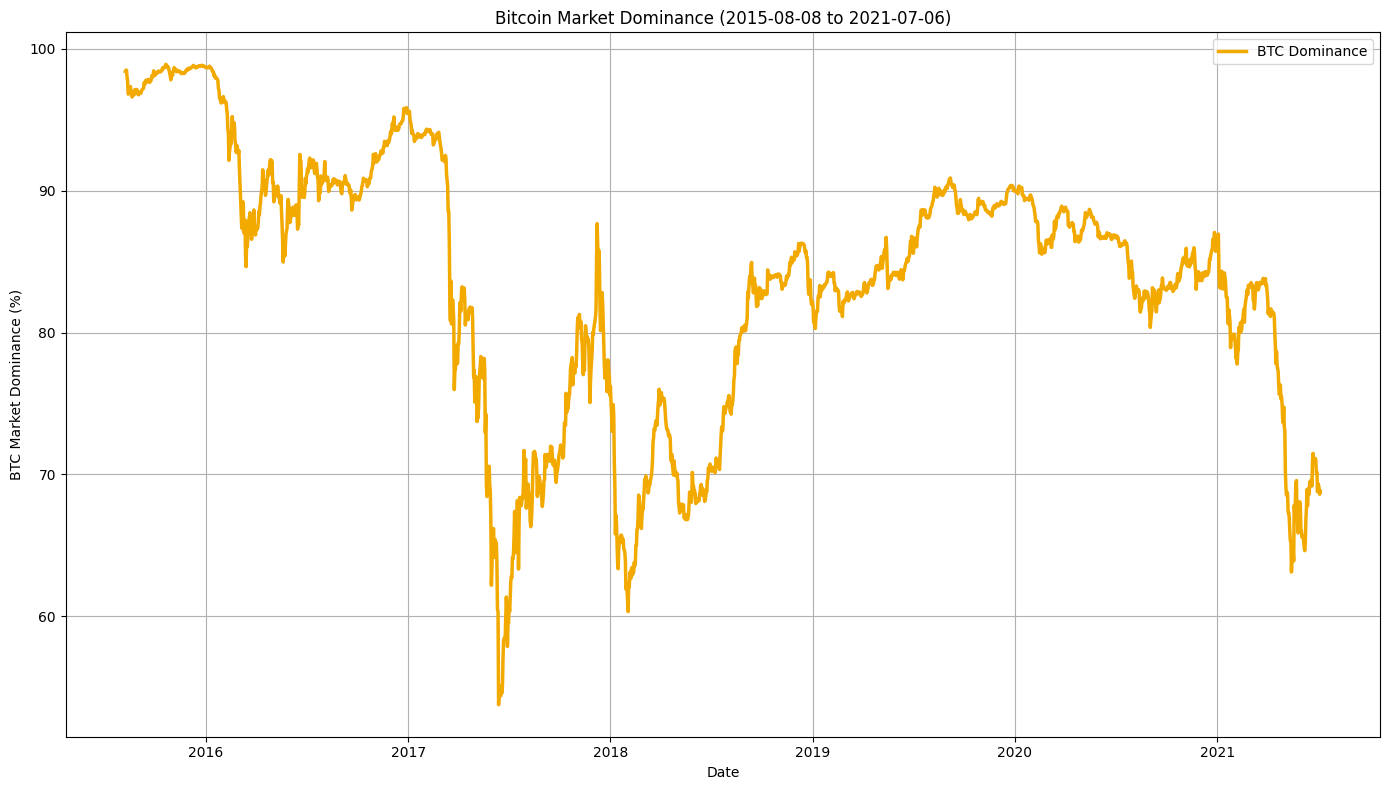

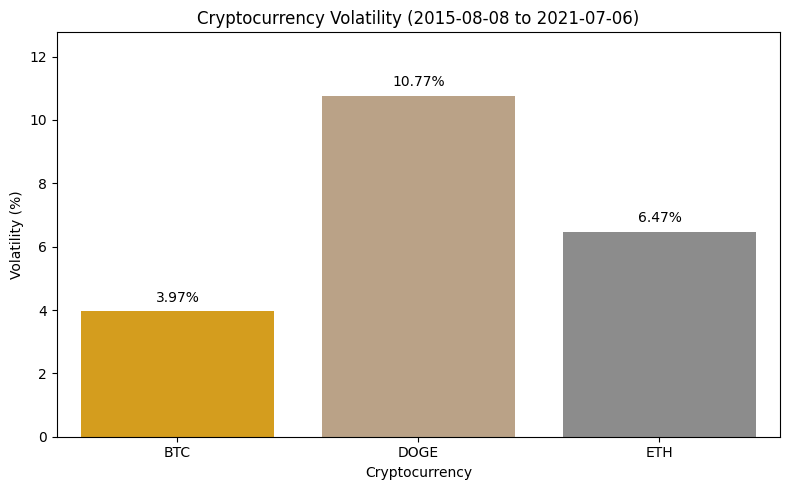

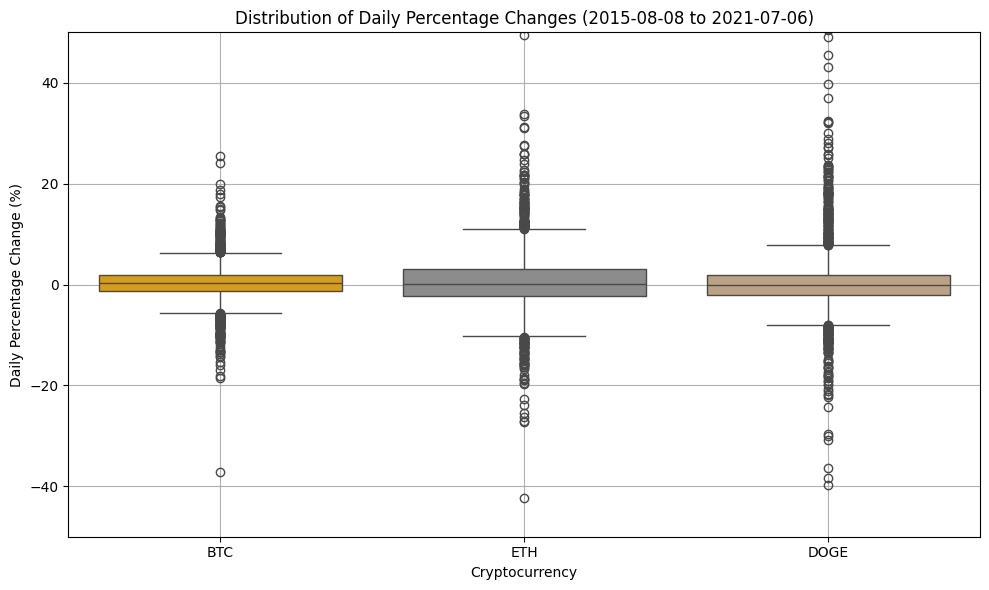

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess CSV data:
df = pd.read_csv('merged_df.csv')
df['date'] = pd.to_datetime(df['date'])

# Filter data to specified date range and symbols:
df = df[(df['date'] >= '2015-08-08') & (df['date'] <= '2021-07-06')]
df = df[df['symbol'].isin(['BTC', 'ETH', 'DOGE'])]

# Calculate daily percentage change:
df['percent_change'] = ((df['close'] - df['open']) / df['open']) * 100

# Create custom color palette:
custom_palette = {'BTC': '#f2a900', 'ETH': '#8c8c8c', 'DOGE': '#c2a37e'}

# Hypothesis 1: Price Changes
symbols = ['BTC', 'ETH', 'DOGE']
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

for i, symbol in enumerate(symbols):
    data = df[df['symbol'] == symbol]
    sns.lineplot(ax=axes[i], data=data, x='date', y='percent_change', color=custom_palette[symbol], linewidth=2.5)
    axes[i].set_title(f'Daily Percentage Changes for {symbol}')
    axes[i].axhline(0, color='gray', linestyle='--', linewidth=0.8)
    axes[i].set_ylabel('Percentage Change (%)')
    if i == 2:
        axes[i].set_xlabel('Date')

plt.tight_layout()
plt.show()

# Hypothesis 2: Trading Volumes
volume_df = df.pivot_table(index='date', columns='symbol', values='volume').reset_index()
volume_df.columns = ['date', 'BTC', 'ETH', 'DOGE']
plt.figure(figsize=(14, 8))
sns.lineplot(data=volume_df, x='date', y='BTC', color=custom_palette['BTC'], linewidth=2.5, label='BTC Volume')
sns.lineplot(data=volume_df, x='date', y='ETH', color=custom_palette['ETH'], linewidth=2.5, label='ETH Volume')
sns.lineplot(data=volume_df, x='date', y='DOGE', color=custom_palette['DOGE'], linewidth=2.5, label='DOGE Volume')
plt.title('Trading Volumes (2015-08-08 to 2021-07-06)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(title='Cryptocurrency')
plt.tight_layout()
plt.show()

# Hypothesis 3: Bitcoin Market Dominance Over Time
marketcap_df = df.groupby(['date', 'symbol'])['marketcap'].sum().unstack().fillna(0)
marketcap_df['total_marketcap'] = marketcap_df.sum(axis=1)
marketcap_df['btc_dominance'] = (marketcap_df['BTC'] / marketcap_df['total_marketcap']) * 100
plt.figure(figsize=(14, 8))
sns.lineplot(data=marketcap_df, x=marketcap_df.index, y='btc_dominance', color=custom_palette['BTC'], linewidth=2.5, label='BTC Dominance')
plt.title('Bitcoin Market Dominance (2015-08-08 to 2021-07-06)')
plt.xlabel('Date')
plt.ylabel('BTC Market Dominance (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Hypothesis 4: Volatility
volatility_data = df.groupby('symbol')['percent_change'].std().reset_index()
volatility_data.columns = ['symbol', 'volatility']
plt.figure(figsize=(8, 5))
sns_bar = sns.barplot(x='symbol', y='volatility', data=volatility_data, palette=custom_palette, hue='symbol', dodge=False)
plt.title('Cryptocurrency Volatility (2015-08-08 to 2021-07-06)')
plt.xlabel('Cryptocurrency')
plt.ylabel('Volatility (%)')
plt.ylim(0, max(volatility_data['volatility']) + 2)
plt.legend([], [], frameon=False)
for index, row in volatility_data.iterrows():
    sns_bar.text(index, row.volatility + 0.3, f'{row.volatility:.2f}%', color='black', ha="center")
plt.tight_layout()
plt.show()

# Hypothesis 4: Distribution of Daily Percentage Changes
plt.figure(figsize=(10, 6))
sns.boxplot(x='symbol', y='percent_change', data=df, palette=custom_palette, hue='symbol', dodge=False)
plt.title('Distribution of Daily Percentage Changes (2015-08-08 to 2021-07-06)')
plt.xlabel('Cryptocurrency')
plt.ylabel('Daily Percentage Change (%)')
plt.ylim(-50, 50)
plt.grid(True)
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()

# Hypothesis 2: Increases in Bitcoin's trading volume are followed by increases in the trading volumes of other cryptocurrencies


correlation_volume_eth = merged_df['volume'].corr(historical_eth_clean['Volume'])
correlation_volume_doge = merged_df['volume'].corr(historical_doge_clean['Volume'])
print("Correlation of Bitcoin's volume with Ethereum's volume:", correlation_volume_eth)
print("Correlation of Bitcoin's volume with Dogecoin's volume:", correlation_volume_doge)

# lagged correlation analysis: correlation with a lag of 1 day:
lagged_correlation_volume_eth = merged_df['volume'].corr(historical_eth_clean['Volume'].shift(1))
lagged_correlation_volume_doge = merged_df['volume'].corr(historical_doge_clean['Volume'].shift(1))
print("Lagged Correlation of Bitcoin's volume with Ethereum's volume (1 day lag):", lagged_correlation_volume_eth)
print("Lagged Correlation of Bitcoin's volume with Dogecoin's volume (1 day lag):", lagged_correlation_volume_doge)